In [166]:
import numpy as np 
import math
import matplotlib.pyplot as plt 
from scipy import optimize
from scipy.optimize import fsolve


from sympy import symbols
from sympy.physics.wigner import wigner_3j
import module1 as m1 # module1 contains the function to convert r_star to r\n",

import cmath
from astropy.io import fits
 
M = 1.e21 #also in planck units
T = 1/(8*np.pi*M)
omegas = np.linspace(.01*T,20*T,2000)

print(omegas[0],omegas[-1])
print(omegas[0]-omegas[1])

import I_functions_class as Inp

X = 1
k = 2
X_prime = 1
k_prime = 3
X_gamma = 1
l = 1
parity = 1
h =3.8e-23  #h and h_prime should be on the same order but smaller than mu
h_prime = 3.9e-23
omega = 4.e-25  #should be much much less than 1/r but lowest one is only ~ 1/r i think -> want to ask about this 
               #5.069927873444599e-25 is the smallest 1/r here but it seems as
n = 1

from imp import reload
reload(Inp)

3.978873577297383e-25 7.957747154594767e-22
-3.978873577297383e-25


<module 'I_functions_class' from '/users/PCON0003/koivuemily/PrimordialBlackHole/I_functions_class.py'>

In [2]:
(h_prime - 4.1796514508e-23 )/4.1796514508e-23  #want this to be much much less than 1 

-0.06690784006558102

In [31]:
omega*rlhs[0] #want this to be much much less than 1 

0.7944801407312484

In [156]:
h-h_prime

-9.999999999999986e-25

In [6]:
kappa = np.sqrt(2*4.1796514508e-23*(4.1796514508e-23-h))
kappa/mu

0.426223603438147

In [5]:
mu = 4.1796514508e-23

In [3]:
#IfunctionsNoM(X,k,X_prime,k_prime,X_gamma,l,parity,h,h_prime,omega,M,n)
tryA2=Inp.IfunctionsNoM(X,k,X_prime,k_prime,X_gamma,l,parity,h,h_prime,omega,M,n)

In [7]:
#IBarplusplusevenfunc(self,X,k,X_prime,k_prime,X_gamma,l,h,h_prime,omega,M,lim1,lim2)
#set1_2 = tryA2.IBarplusplusevenfunc(X,k,X_prime,k_prime,X_gamma,l,h,h_prime,omega,M,1.,2.)

In [7]:
direcPhoton = '/fs/scratch/PCON0003/emily/PhotonWaveFunctionFits/'
        
hdu = fits.open(direcPhoton+str(l)+'.fits')
        
r_points_gamma_Hdu = hdu[tryA2.omega_index].data.field('rpoints_up')

In [137]:
rdata = r_points_gamma_Hdu.data

In [138]:
hdu[-1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   72 / length of dimension 1                          
NAXIS2  =               120000 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    5 / number of table fields                         
TTYPE1  = 'rpoints_up'                                                          
TFORM1  = 'D       '                                                            
TTYPE2  = 'F_points_up'                                                         
TFORM2  = 'M       '                                                            
TTYPE3  = 'z_points_up'     

In [28]:
r_points_gamma_Hdu

array([ 2.00000000e+24,  1.99998275e+24,  1.99996550e+24, ...,
       -6.99568748e+22, -6.99741249e+22, -6.99913750e+22])

In [16]:
direcElectron = '/users/PCON0003/koivuemily/PrimordialBlackHole/ElectronWaveFunctionFits/'

In [17]:
hdu = fits.open(direcElectron+str(k)+'ExtendedOmega.fits')

In [18]:
r_points = hdu[-1].data.field('rpoints_up')

In [21]:
r_points

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
TYPE    = 'Electron Wavefunction'                                               
R_INIT  =                2E+24                                                  
R_FINAL =               -7E+22                                                  
M       =                1E+21                                                  
L       =                  3.0                                                  
TOL     =                1E-10                                                  
MU      =     4.1796514508E-23                                                  
NU      =                  1.0                                                  
LAM     =                  1

In [57]:
r_initial = 10000.*M
r_final= -70.*M
tol = 1.e-10

In [58]:
PWF = Inp.PhotonWaveFunction(M, omega, l, tol)
r_gamma, F_points_gamma, z_points_gamma, f_points_gamma_prime = PWF.RK_4(r_initial, r_final, 240000, up = True)
r_gamma_in, F_points_gamma_in, z_points_gamma_in, f_points_gamma_prime_in = PWF.RK_4(r_final, r_initial, 240000, up = False)
Rgamma, Tgamma = PWF.get_R_and_T_coeff(r_gamma,F_points_gamma,z_points_gamma,r_gamma_in,F_points_gamma_in,z_points_gamma_in)

fpoints0 is (1+0j)
normalized using rup neg infinity:-7e+22
(2.0511637004581417e-07+3.8011834644223063e-07j)
fpoints0 renormalized is (2.0511637004581417e-07+3.8011834644223063e-07j)
fpoints0 is (1+0j)
is this rstar infinity: 1e+25
(-4.1897212492378496e-07-1.0500019571229221e-07j)
fpoints0 renormalized is (-4.1897212492378496e-07-1.0500019571229221e-07j)
rin negative infinity-7e+22
compare T:(1.865626825627471e-13, 1.865626825627713e-13)
rstar up used 1e+25
t phase is -2.9240363811976104
rstar used :-7e+22


In [98]:
#F_points_gamma_in = F_points_gamma_in[::-1]
#len(F_points_gamma_in)
print(r_gamma[::2][113207]/M)


500.00633335972145


/users/PCON0003/koivuemily/.conda/envs/local1/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


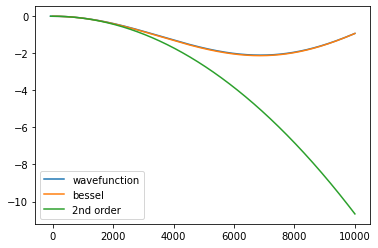

/users/PCON0003/koivuemily/.conda/envs/local1/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


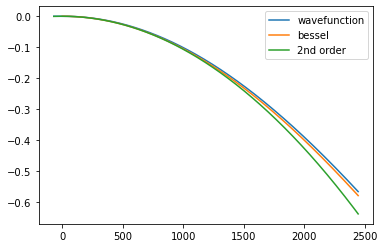

/users/PCON0003/koivuemily/.conda/envs/local1/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


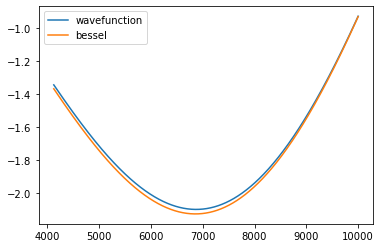

In [71]:
import scipy as sci

psi_d4 = sci.special.spherical_jn(1, omega*r_gamma_in, derivative=False)


plt.plot(r_gamma_in/M,F_points_gamma_in,label='wavefunction')
plt.plot(r_gamma_in/M,psi_d4*-2*omega*r_gamma_in,label='bessel')
plt.plot(r_gamma_in/M,-2*(omega**2*r_gamma_in**2)/3,label='2nd order')
plt.legend()
plt.show()


plt.plot(r_gamma_in[:60000]/M,F_points_gamma_in[:60000],label='wavefunction')
plt.plot(r_gamma_in[:60000]/M,psi_d4[:60000]*-2*omega*r_gamma_in[:60000],label='bessel')
plt.plot(r_gamma_in[:60000]/M,-2*(omega**2*r_gamma_in[:60000]**2)/3,label='2nd order')
plt.legend()
plt.show()

plt.plot(r_gamma_in[100000:]/M,F_points_gamma_in[100000:],label='wavefunction')
plt.plot(r_gamma_in[100000:]/M,psi_d4[100000:]*-2*omega*r_gamma_in[100000:],label='bessel')
#plt.plot(r_gamma_in/M,-2*(omega**2*r_gamma_in**2)/3,label='2nd order')
plt.legend()
plt.show()


In [197]:
def rhs(h,h_prime,omega,k,k_prime,M,r_initial, r_final,lentest): 
    
    nu = 1.
    mu =4.1796514508e-23 #planck units 
    lam = 1.
    GC = 1.
    c = 1.
    tol = 1.e-10
    step_size_for_inte = 1*240000
        
    first_coeff = omega*((h-h_prime)**2)/(36*np.pi*mu**2)
    brac = 0 
    
    #L=j-1/2*s
    
    j=(np.abs(k) - 1/2)
    j_prime = (np.abs(k_prime) - 1/2)
    
    s=0
    s_prime=0
        
    if k !=0:
        s= (k/np.abs(k))
    if k_prime!=0:
        s_prime=k_prime/np.abs(k_prime)
        
    L=j-.5*s
    L_prime=j_prime -.5*s_prime 
    print(L,L_prime)
    
    if np.abs(L_prime-(L+1))<tol:
        brac = (L+1)/(2*L+1)
    elif np.abs(L_prime-(L-1))<tol: 
        brac = L/(2*L+1)
    else: 
        brac=0.
    
    print(first_coeff,brac)
    #try0 = ElectronWaveFunction(nu, h, k, mu, M, lam, GC, c, tol)
    #r_points,F_points_xkh, G_points_xkh = try0.RK_4(r_initial, r_final, step_size_for_inte, up = True)
    
    #try1 = ElectronWaveFunction(nu, h_prime, k_prime, mu, M, lam, GC, c, tol)
    #r_points,F_points_xkprimehprime, G_points_xkprimehprime = try1.RK_4(r_initial, r_final, step_size_for_inte, up = True)
    
    
    omega_index = round(omega*100*(8*np.pi*M) -1)
    print(omega_index)
    h_index = round(h*100*(8*np.pi*M) -1)
    h_prime_index = round(h_prime*100*(8*np.pi*M) -1)
    
    
    direcElectron = '/users/PCON0003/koivuemily/PrimordialBlackHole/ElectronWaveFunctionFits/'
    if k>0:
        hdu = fits.open(direcElectron+str(k)+'ExtendedOmega.fits')
    else:
        hdu = fits.open(direcElectron+'min'+str(k)+'ExtendedOmega.fits')

    #r_points_star = hdu[h_index].data.field('rpoints_up')
    #this is in rstar, should I switch to r? gonna try it 
    
    #r_points = np.array([m1.r_star_to_r(x,M,tol) for x in r_points_star])
    
    #back to using rstar
    r_points = hdu[h_index].data.field('rpoints_up')
     
    F_points_xkh = hdu[h_index].data.field('F_points_up')
    G_points_xkh = hdu[h_index].data.field('G_points_up')
    
    
   
    if k_prime>0:
        hdu = fits.open(direcElectron+str(k_prime)+'ExtendedOmega.fits')
    else:
        hdu = fits.open(direcElectron+'min'+str(k_prime)+'ExtendedOmega.fits')

    #r_points = hdu[self.h_index+1]['rpoints_up']
    F_points_xkh_prime = hdu[h_prime_index].data.field('F_points_up')
    G_points_xkh_prime = hdu[h_prime_index].data.field('G_points_up')
    
    df_xkh_dr =[]
    df_xkh_prime_dr =[]
    rstar_step = r_points[0]-r_points[1]
    for i in range(lentest-1):
        df_xkh_dr.append( (F_points_xkh[i+1]-F_points_xkh[i])/rstar_step) 
        df_xkh_prime_dr.append( (F_points_xkh_prime[i+1]-F_points_xkh_prime[i])/rstar_step)
         
        
    plt.plot(r_points[:lentest]/M,G_points_xkh[:lentest],label='g')
    plt.plot(r_points[:lentest-1]/M, (k*F_points_xkh[:lentest-1]/r_points[:lentest-1] - df_xkh_dr)/(2*mu),label='F')
    plt.legend()
    plt.title('XKH')
    plt.ylim(-1.e-18,5.e-18)
    plt.show()

    plt.plot(r_points[:lentest]/M,G_points_xkh_prime[:lentest],label='g')
    plt.plot(r_points[:lentest-1]/M, (k*F_points_xkh_prime[:lentest-1]/r_points[:lentest-1] - df_xkh_prime_dr)/(2*mu),label='F')
    plt.legend()
    plt.title('XKH_Prime')
    plt.ylim(-1.e-18,5.e-18)
    plt.show()
             
    
    print((F_points_xkh[0]))
    print((F_points_xkh_prime[0]))
    print()
    print(r_points[86316]/M)
    dr = r_points[0]-r_points[1]
    print(dr)
    inte = 0 
    integ = []
    for i in range(toplen,lentest-1,1):
        inte += .5*(np.conjugate(F_points_xkh[i])*(F_points_xkh_prime[i])*r_points[i] + np.conjugate(F_points_xkh[i+1])*(F_points_xkh_prime[i+1])*r_points[i+1])*dr
        integ.append(inte)
    #print(inte)
    plt.loglog(r_points[toplen:lentest-1]/M,np.abs(integ*np.conjugate(integ)*brac*first_coeff))
    #plt.xlim(100000,130000)
    plt.xlabel('r_points')
    plt.ylabel('Integral RHS not squared')
    plt.show()
    return np.conjugate(inte)*inte*brac*first_coeff, np.abs(integ*np.conjugate(integ)*brac*first_coeff)
    #return np.conjugate(F_points_xkh)*(F_points_xkh_prime)*r_points*dr


1.0 2.0
2.0245452341896334e-30 0.6666666666666666
0


/users/PCON0003/koivuemily/.conda/envs/local1/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/users/PCON0003/koivuemily/.conda/envs/local1/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


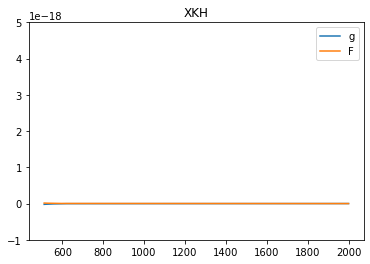

/users/PCON0003/koivuemily/.conda/envs/local1/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/users/PCON0003/koivuemily/.conda/envs/local1/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


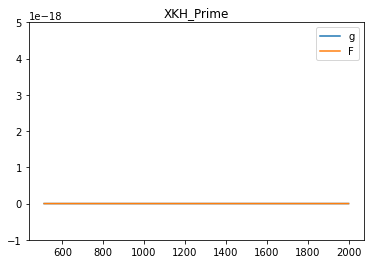

(-2.5322208815324926e-31-8.432065976059953e-31j)
(-1.810413074839983e-32-4.66677405818045e-32j)

511.04279601165007
1.725007187534676e+19


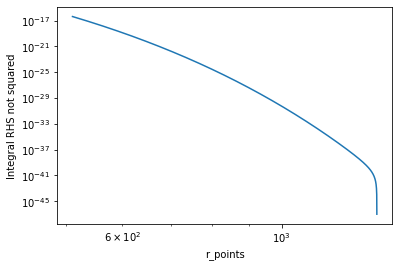

In [198]:
right2,right2plot = rhs(h,h_prime,omega,k,k_prime,M,2000.*M, 50.*M,lentest)

#this gives the mod squared of integral F*Fprime*r dr times coefficients

In [129]:
#lentest = 113043 for 50M 
lentest = 86316 #for 500M

In [163]:
right2

(4.132664873945594e-17+0j)

In [19]:
tryA2=Inp.IfunctionsNoM(X,k,X_prime,k_prime,X_gamma,l,parity,h,h_prime,omega,M,n)
lhs = tryA2.IBarplusminusevenfunc(X,k,X_prime,k_prime,X_gamma,l,h,h_prime,omega,M,1.,2.)

In [194]:
def IBarplusminusevenfunctest(X,k,X_prime,k_prime,X_gamma,l,h,h_prime,omega,M,F_points_gamma_in, z_points_gamma_in):
        nu = 1.
        mu = 4.1796514508e-23 
        lam = 1.
        GC = 1.
        c = 1.
        tol = 1.e-10
        omega_index = round(omega*100*(8*np.pi*M) -1)
        print(omega_index)
        h_index = round(h*100*(8*np.pi*M) -1)
        h_prime_index = round(h_prime*100*(8*np.pi*M) -1)
    
        
        #far from BH and then work towards that (up)
        #r_initial = 5000.*M #in rstar
        #r_final = -70.*M  #in rstar 
        
       
        if X==0:
            uptrue = False
        else:
            uptrue = True
        if X_prime==0:
            uptrue_Xprime = False
        else:
            uptrue_Xprime = True
            
        if X_gamma==0:
            uptrue_Xgamma = False
        else:
            uptrue_Xgamma = True 
            
        """
        #might pass this in instead. will ask 
        try0 = ElectronWaveFunction(nu, h, k, mu, M, lam, GC, c, tol)
        r_points,F_points_xkh, G_points_xkh = try0.RK_4(r_initial, r_final, self.step_size_for_inte, up = uptrue)
        
        try1 = ElectronWaveFunction(nu, h_prime, k_prime, mu, M, lam, GC, c, tol)
        r_points_prime,F_points_xkh_prime, G_points_xkh_prime = try1.RK_4(r_initial, r_final, self.step_size_for_inte, up = uptrue_Xprime)
        
        
        phot_try0= PhotonWaveFunction(M,omega,l,tol)
        r_points_gamma, f_points_gammalomega, z_points_gammalomega, f_points_gammalomega_prime = phot_try0.RK_4(r_initial_gamma, r_final_gamma, self.step_size_for_inte, up = uptrue_Xgamma)
        
        print(r_points[0],r_points_prime[0],r_points_gamma[0])
        
        """
        psi_gammalomega = F_points_gamma_in[::-1][::2]
        psi_gammalomega_prime =z_points_gamma_in[::-1][::2]
        
        
        direcElectron = '/users/PCON0003/koivuemily/PrimordialBlackHole/ElectronWaveFunctionFits/'
        if k>0:
            hdu = fits.open(direcElectron+str(k)+'ExtendedOmega.fits')
        else:
            hdu = fits.open(direcElectron+'min'+str(k)+'ExtendedOmega.fits')
        
        r_points = hdu[h_index].data.field('rpoints_up')
        if uptrue == True: 
            F_points_xkh = hdu[h_index].data.field('F_points_up')
            G_points_xkh = hdu[h_index].data.field('G_points_up')
        else: 
            F_points_xkh = hdu[h_index].data.field('F_points_in')
            G_points_xkh = hdu[h_index].data.field('G_points_in')
            
        if k_prime>0:
            hdu = fits.open(direcElectron+str(k_prime)+'ExtendedOmega.fits')
        else:
            hdu = fits.open(direcElectron+'min'+str(k_prime)+'ExtendedOmega.fits')
        
        #r_points = hdu[self.h_index+1]['rpoints_up']
        if uptrue_Xprime == True: 
            F_points_xkh_prime = hdu[h_prime_index].data.field('F_points_up')
            G_points_xkh_prime = hdu[h_prime_index].data.field('G_points_up')
        else: 
            F_points_xkh_prime = hdu[h_prime_index].data.field('F_points_in')
            G_points_xkh_prime = hdu[h_prime_index].data.field('G_points_in')
        
        

        
        print(r_points[lentest]/M)
        psi_gammalomega = psi_gammalomega[:lentest]
        psi_gammalomega_prime =psi_gammalomega_prime[:lentest]
        
        
        g_xkh = np.array(G_points_xkh[:lentest])
        g_xkh_prime = np.array(G_points_xkh_prime[:lentest])
        
        
        gstar_xkh = np.conjugate(np.array(G_points_xkh[:lentest]))
        g_xprime_kprime_hprime = np.array(G_points_xkh_prime[:lentest])
        
        fstar_xkh = np.conjugate(np.array(F_points_xkh[:lentest]))
        f_xkh = np.array(F_points_xkh[:lentest])
        f_xprime_kprime_hprime = np.array(F_points_xkh_prime[:lentest])
        
        
        #need deriviative 
        df_xkh_dr =[]
        df_xkh_prime_dr =[]
        rstar_step = r_points[0]-r_points[1]
        for i in range(lentest-1):
            df_xkh_dr.append( (f_xkh[i+1]-f_xkh[i])/rstar_step) 
            df_xkh_prime_dr.append( (f_xprime_kprime_hprime[i+1]-f_xprime_kprime_hprime[i])/rstar_step)
            
        plt.plot(r_points[:lentest]/M,g_xkh,label='g')
        plt.plot(r_points[:lentest-1]/M, (k*f_xkh[:-1]/r_points[:lentest-1] - df_xkh_dr)/(2*mu),label='F')
        plt.legend()
        plt.title('XKH')
        plt.ylim(-1.e-18,5.e-18)
        plt.show()
        
        plt.plot(r_points[:lentest],g_xkh_prime,label='g')
        plt.plot(r_points[:lentest-1], (k*f_xprime_kprime_hprime[:-1]/r_points[:lentest-1] - df_xkh_prime_dr)/(2*mu),label='F')
        plt.legend()
        plt.title('XKH_Prime')
        plt.ylim(-1.e-18,5.e-18)
        plt.show()
            
        #psi_gammalomega = np.array(f_points_gammalomega)
        #psi_gammalomega_prime = np.array(z_points_gammalomega)
        
        r = np.array([m1.r_star_to_r(x,M,tol) for x in r_points[:lentest]]) #should be same for all I integrals (per M) so can pass to the functions 
        rdependentpart_top = (1-2*M/r)/(r**2*np.sqrt(2*omega**3))
        rdependentpart_bottom = np.sqrt(1-2*M/r)/(r*np.sqrt(2*omega))
        
        
        #print(gstar_xkh,fstar_xkh,psi_gammalomega,rdependentpart_top,rdependentpart_bottom)

        #print(np.dot(gstar_xkh[0],gstar_xprime_minkprime_hprime[0]))
        #print(fstar_xkh*fstar_xprime_minkprime_hprime)
        
        topline = (fstar_xkh*g_xprime_kprime_hprime - gstar_xkh*f_xprime_kprime_hprime)*np.sqrt(l*(l+1))*psi_gammalomega*rdependentpart_top
           
        botline = (fstar_xkh*g_xprime_kprime_hprime + gstar_xkh*f_xprime_kprime_hprime)*((k-k_prime)/(omega*np.sqrt(l*(l+1))))*psi_gammalomega_prime*rdependentpart_bottom
        
        
        #print(topline, botline)
        #return topline+botline
        
        #midpoint method
        inte = 0.
        rstar_step = r_points[0]-r_points[1]   #switched order to get positive steps in
        integ=[]
        for index in range(toplen,len(topline)-1,1):  #rewrite as np.sum
            inte += .5*(topline[index]+topline[index+1] + botline[index]+botline[index+1])*rstar_step
            integ.append(inte)
        #return np.array(integ*np.conjugate(integ)) #*self.coeff_m 
        #return (topline+botline)
        plt.loglog(r_points[toplen:lentest-1]/M,np.abs( np.array(integ)*tryA2.coeff_no_m_even*np.conjugate(np.array(integ)*tryA2.coeff_no_m_even)) )
        #plt.plot(r_points[113043],5,color='green', marker='o',markersize=5)
        plt.loglog(2000.,1.e-50)
        plt.show()
        return((inte*tryA2.coeff_no_m_even)*np.conjugate((inte*tryA2.coeff_no_m_even)),np.abs(np.array(integ)*tryA2.coeff_no_m_even*np.conjugate(np.array(integ)*tryA2.coeff_no_m_even)),r)
    
    


0
511.04279601165007


/users/PCON0003/koivuemily/.conda/envs/local1/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/users/PCON0003/koivuemily/.conda/envs/local1/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


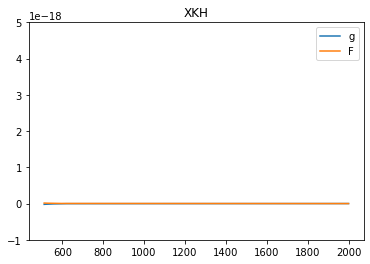

/users/PCON0003/koivuemily/.conda/envs/local1/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/users/PCON0003/koivuemily/.conda/envs/local1/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


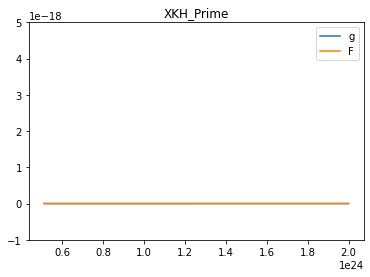

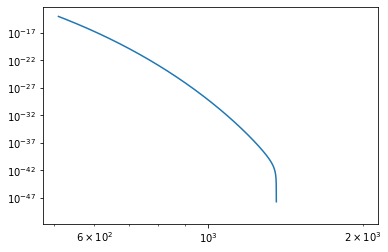

In [195]:
lhs,lhsplot,rlhs = IBarplusminusevenfunctest(X,k,X_prime,k_prime,X_gamma,l,h,h_prime,omega,M,F_points_gamma_in, z_points_gamma_in)
lhs = lhs

#D2 is satisfied here for things above 500 M or so  - possible i was starting the integration too close to black hole 

In [128]:
print(rlhs[-26891]/M)
len(rlhs)-26891



500.007858658036


86316

In [193]:
rlhs[28251]/M

#toplen = 28251
toplen = 37251

In [205]:
print('right, left')
print(np.abs(right2),np.abs(3*lhs))
print('right/left')
print(np.abs(right2)/np.abs(3*lhs))

right, left
4.132664873938673e-17 2.5547854833127548e-14
right/left
0.0016176171740963175


In [192]:
rlhs[37251]/M

1344.3994390985824

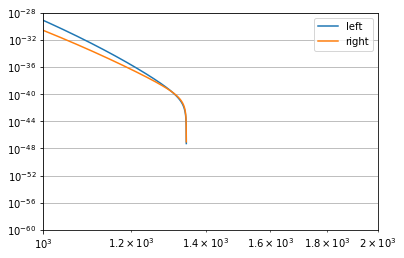

In [203]:
plt.loglog(rlhs[37251:-1]/M,3*lhsplot,label='left')
#plt.loglog(rlhs[:-1]/M, lhsplot,label='left')
plt.loglog(rlhs[37251:-1]/M,right2plot,label='right')
plt.legend()
plt.grid()
plt.xlim(1.e3,2.e3)
plt.ylim(1.e-60,1.e-28)
plt.show()

In [20]:
import matplotlib.pyplot as plt

In [45]:
plt.scatter(1,totalleft*np.conjugate(totalleft),label='left')
#plt.plot(r_points,right2*np.conjugate(right2),label='right')
plt.legend()
plt.title('LHS')
plt.show()

#plt.plot(r_points,lhs*np.conjugate(lhs),label='left')
plt.scatter(1,right2*np.conjugate(right2),label='right')
plt.legend()
plt.title('RHS')
plt.show()

plt.scatter(1,totalleft*np.conjugate(totalleft),label='left')
plt.scatter(2,right2*np.conjugate(right2),label='right')
plt.legend()
plt.show()

NameError: name 'totalleft' is not defined

In [24]:
def coeff_m(j,j_prime,m,m_prime):
    m_gamma = -1*(-m+m_prime)
    l=1
    #print("inside")
    #print(float(wigner_3j(j,j_prime,l,-m,m_prime,m_gamma)))
    #print((float(wigner_3j(j,j_prime,l,-m,m_prime,m_gamma)))**2)
    return float(wigner_3j(j,j_prime,l,-m,m_prime,m_gamma))*(-1)**(l-j_prime-m)
lhs_coeff_total = []

j=(np.abs(k) - 1/2)
j_prime = (np.abs(k_prime) - 1/2)
# m is -j to j

m_vals = np.arange(-j,j+1,1)
m_prime_vals = np.arange(-j_prime,j_prime+1,1)

s_prime_vals = np.arange(-k_prime,k_prime+1,1)
print(s_prime_vals)

#s prime is -1 (k_prime negative), 0 (k_prime = 0), 1 (k_prime positive)
#need to sum over s_prime as well 
#basically gives a x9 here since there is no s' dependence 

[-3 -2 -1  0  1  2  3]


In [168]:
for m_prime_ind in range(len(m_prime_vals)):
    for m_ind in range(len(m_vals)):
        
        #print((coeff_m(j,j_prime, m_vals[m_ind],m_prime_vals[m_prime_ind])))
        lhs_coeff_total.append((coeff_m(j,j_prime, m_vals[m_ind],m_prime_vals[m_prime_ind]))**2)

print(np.abs(lhs)) 
print(np.sum(lhs_coeff_total))
totalleft = 3*lhs
print(np.abs(totalleft))
print(right2)

8.515951611042777e-15
5.0
2.554785483312833e-14
(4.132664873945594e-17+0j)


In [26]:
#still need to do the 2000M to 5000M analytic solution, so left side is actually going to be larger still 

In [164]:
(2*j + 1)

4.0

In [13]:
#start analytic for dipole

In [154]:
C = 1/np.sqrt(4*h*h_prime)
C

6.681531047810609e+23

In [155]:
M

1e+21

In [204]:
tryA2.coeff_no_m_even

-2.6761861742291566e+22j

In [205]:
mu = 4.1796514508e-23

In [206]:
(k-k_prime)*np.exp(complex(0,1)*(np.sqrt(h_prime**2 - mu**2)-np.sqrt(h**2-mu**2)+omega)*2000.*M)**tryA2.Delta_no_m(k,k_prime,l)/(2000.*M*np.sqrt(2*omega*l*(l+1)*4*h*h_prime))

/tmp/slurmtmp.14085546/ipykernel_185672/1319690811.py:1: RuntimeWarning: invalid value encountered in sqrt
  (k-k_prime)*np.exp(complex(0,1)*(np.sqrt(h_prime**2 - mu**2)-np.sqrt(h**2-mu**2)+omega)*2000.*M)**tryA2.Delta_no_m(k,k_prime,l)/(2000.*M*np.sqrt(2*omega*l*(l+1)*4*h*h_prime))


(nan+nanj)

In [207]:
np.sqrt(h/np.sqrt(h**2+mu**2))

0.48237667119590116

In [160]:
import module1 as m1 

In [173]:
m1.r_star_to_r(500.*M,M,1.e-10)/(500.*M)

0.9780194523441541